### Practice using Decision Trees to classify flowers in the Iris dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [4]:
# Assign the url of the file to the variable iris_dataset_url
iris_dataset_url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'

# Read the file into a DataFrame using Pandas
data = pd.read_csv(iris_dataset_url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


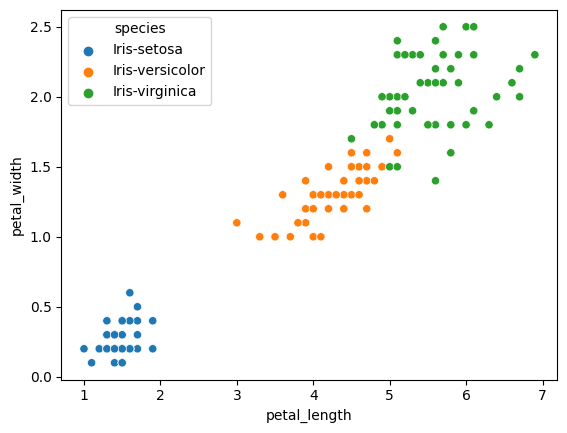

In [7]:
# Let's visualize the data using a scatterplot with color coding for each species
import seaborn as sns

ax1 = sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)

In [11]:
# There is a clear separation between the three species in terms of petal length and petal width

# Let's use a decision tree to classify the species
# First, we need to split the data into training and test sets

# Create a list of the feature column's names
features = ['petal_length', 'petal_width']
# Use the list to select a subset of the original DataFrame
features_subset = data[features]
# Display the first 5 rows
features_subset.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
# Now we need to create a list of the target column's names
targets = ['species']
# Use the list to select a subset of the original DataFrame
targets_subset = data[targets]
# Display the first 5 rows
targets_subset.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
# Now we need to split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features_subset, targets_subset, test_size=0.2, random_state=1)
# x_train: training set of features
# x_test: test set of features
# y_train: training set of targets
# y_test: test set of targets
# test_size: the proportion of the dataset to include in the test split
# random_state: the seed used by the random number generator

# Let's build a decision tree classifier
model = DecisionTreeClassifier(max_depth=2)
# Now we need to train the model using the training sets
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [13]:
# Now we can use the model to predict the species of a flower
# Let's predict the species of a flower with petal length 5 and petal width 1.5
model.predict([[5, 1.5]])


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [15]:
# Let's scale up the problem and predict the species of the first 10 flowers in the test set
first_10_predictions = model.predict(x_test[0:10])
first_10_predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [16]:
# Now let's compare the predictions with the actual species
comparison = pd.DataFrame({'actual': y_test[0:10].values.flatten(), 'predicted': first_10_predictions.flatten()})
comparison

,actual,predicted
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [18]:
# The model made zero mistakes in the first 10 predictions.
n_mistakes = comparison[comparison['actual'] != comparison['predicted']].shape[0]
n_mistakes

0

In [17]:
# Let's calculate the accuracy of the model for the entire test set
accuracy = model.score(x_test, y_test)
accuracy

0.9666666666666667